In [89]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib inline

In [90]:
#ECUACIONES DE MOVIMIENTO

In [91]:
#Se trabaja las ecuaciones en unidades canonicas

#Ecuaciones para N cuerpos
def Ecs(y,t,masas):
    
    #Listas y condiciones del sistema
    M = len(y)
    N=M/6
    r = zeros((N,3))
    v = zeros((N,3))
    drdt = zeros((N,3))
    dvdt = zeros((N,3)) 
    
    #Elementos de las listas
    for i in xrange(N):
        r[i] = y[3*i:3*i+3];
        v[i] = y[3*N+3*i:3*N+3*i+3]

        
    # Ds
    for i in xrange(N):
        
        drdt[i]=v[i]
        for j in xrange(N):
            if i==j:continue
            dvdt[i]+=-masas[j]/norm(r[i]-r[j])**3*(r[i]-r[j])

    # Ecuaciones para el integrador
    dydt=array([])
    for i in xrange(N):dydt=concatenate((dydt,drdt[i]))
    for i in xrange(N):dydt=concatenate((dydt,dvdt[i]))
        
    return dydt

In [92]:
#Condiciones del sistema

In [189]:
#Características del sistema,particula 1, 2 y 3
y1 = [-1,0,0]
v1 = [0,0,0]
y2 = [2,0,0]
v2 = [0,2.2,0]
y3 = [3.6,0,0]
v3 = [0,0.4,0]

#Masas en orden (1,2,3)
Ms = [10.,5.,0.01]
M = sum(Ms)*1.0

#Condiciones iniciales del sistema
ys = y1 + y2 + y3
vs = v1 + v2 + v3
Ys = ys + vs

In [190]:
#Solución al sistema con Odeint
Nt = 1000
Ts = np.linspace(0,40,Nt)

Sol = odeint(Ecs,Ys,Ts,args=(Ms,))

In [191]:
#Graficas en el sistema rotante

In [192]:
N = int(len(Ys)/6.0)
rs = zeros( (N,Nt,3) )
vs = zeros( (N,Nt,3) )

#Posiciones
for i in xrange(N):
    rs[i] = Sol[:,3*i:3*i+3]
    vs[i] = Sol[:,3*(N+i):3*(N+i)+3]

#Centro de masa del sistema
CM = zeros((Nt,3))
VM=zeros((Nt,3))

#Calculo del centro de masas

#Posiciones
for j in xrange(Nt):
    for i in xrange(N):
        CM[j]+=Ms[i]*rs[i,j]/M

#Velocidades
for j in xrange(Nt):
    for i in xrange(N):
        VM[j]+=Ms[i]*vs[i,j]/M

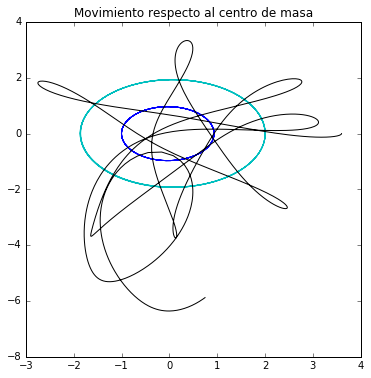

In [193]:
#Movimiento respecto al centro de masas
for i in xrange(N):
    rs[i,:] = rs[i,:] - CM
    vs[i,:] = vs[i,:] - VM

#Grafico

fig2d = plt.figure(figsize=(6,6))
ax2d=fig2d.gca()
for i in xrange(N):
    r=rs[i,:]
    ax2d.plot(r[:,0],r[:,1],label='m1')
    ax2d.plot(r[0,0],r[0,1],label='m2')
    ax2d.plot(r[-1,0],r[-1,1],label='m3')
    plt.title('Movimiento respecto al centro de masa')
    

In [194]:
"""
En la teoria del CRTBP (Problema de los tres cuerpos no gerarquico) una de las suposiciones
es que las masas mas masivas describen un movimiento paracticamente circular y que sus masas son mucho
mas grandes que la tercera (en negro), aca vemos entonces que las dos particulas mas masivas describen una
trayectoria que se podria decir estable mientras la otra particula describe una trayectoria bastante discola.
Esto es debido a que este problema no es jerarquico, es decir la distancia de la tercera particula
es comparable con la de las otras dos, con mayor distancia se esperaria que la 3 particula sienta
las ootras dos como una unica mas y asi se tendria un problema de dos cuerpos de tipo jerarquico que si
prsenta estabilidad.
"""

'\nEn la teoria del CRTBP (Problema de los tres cuerpos no gerarquico) una de las suposiciones\nes que las masas mas masivas describen un movimiento paracticamente circular y que sus masas son mucho\nmas grandes que la tercera (en negro), aca vemos entonces que las dos particulas mas masivas describen una\ntrayectoria que se podria decir estable mientras la otra particula describe una trayectoria bastante discola.\nEsto es debido a que este problema no es jerarquico, es decir la distancia de la tercera particula\nes comparable con la de las otras dos, con mayor distancia se esperaria que la 3 particula sienta\nlas ootras dos como una unica mas y asi se tendria un problema de dos cuerpos de tipo jerarquico que si\nprsenta estabilidad.\n'